In [1]:
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
# npy파일 만들기
# groups_folder_path = './img'
# categories = ['보합','상승','하락']
# num_classes = len(categories)
# image_w = 64
# image_h = 64

# pixels = image_h * image_w * 3
  
# x = []
# y = []
  
# for idex, categorie in enumerate(categories):
#     label = [0 for i in range(num_classes)]
#     label[idex] = 1
#     image_dir = groups_folder_path +'/'+ categorie
#     files = glob.glob(image_dir + '/*.png')
#     print(categorie, "파일 길이 :", len(files))
    
#     for i, f in enumerate(files):
#         img = Image.open(f)
#         img = img.convert('RGB')
#         img = img.resize((image_w, image_h))
#         data = np.asarray(img)
        
#         x.append(data)
#         y.append(label)

# x = np.array(x)
# y = np.array(y)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True, random_state=1234)
# xy = (x_train, x_test, y_train, y_test)
 
# np.save("./img_data.npy", xy)

보합 파일 길이 : 7105
상승 파일 길이 : 4957
하락 파일 길이 : 4560


In [2]:
x_train, x_test, y_train, y_test = np.load("./img_data.npy", allow_pickle=True)
print(x_train.shape)
print(x_test.shape)

(13297, 64, 64, 3)
(3325, 64, 64, 3)


In [3]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [4]:
num_epochs = 10
batch_size = 100
learning_rate = 0.001
num_classes = 3

In [5]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
 
model = Sequential()
model.add(Convolution2D(128, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Convolution2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))

Epoch 1/1000
133/133 [==============================] - 73s 547ms/step - loss: 0.2160 - accuracy: 0.4285 - val_loss: 0.2153 - val_accuracy: 0.4232

Epoch 00001: val_loss improved from inf to 0.21531, saving model to img_cnn2.h5
Epoch 2/1000
133/133 [==============================] - 73s 549ms/step - loss: 0.2115 - accuracy: 0.4484 - val_loss: 0.2081 - val_accuracy: 0.4671

Epoch 00002: val_loss improved from 0.21531 to 0.20812, saving model to img_cnn2.h5
Epoch 3/1000
133/133 [==============================] - 71s 534ms/step - loss: 0.2094 - accuracy: 0.4612 - val_loss: 0.2073 - val_accuracy: 0.4728

Epoch 00003: val_loss improved from 0.20812 to 0.20727, saving model to img_cnn2.h5
Epoch 4/1000
133/133 [==============================] - 71s 534ms/step - loss: 0.2087 - accuracy: 0.4645 - val_loss: 0.2071 - val_accuracy: 0.4707

Epoch 00004: val_loss improved from 0.20727 to 0.20714, saving model to img_cnn2.h5
Epoch 5/1000
133/133 [==============================] - 71s 534ms/step - los

133/133 [==============================] - 65s 487ms/step - loss: 0.1941 - accuracy: 0.5183 - val_loss: 0.2032 - val_accuracy: 0.4722

Epoch 00039: val_loss did not improve from 0.20275
Epoch 40/1000
133/133 [==============================] - 65s 486ms/step - loss: 0.1936 - accuracy: 0.5166 - val_loss: 0.2033 - val_accuracy: 0.4758

Epoch 00040: val_loss did not improve from 0.20275
Epoch 00040: early stopping


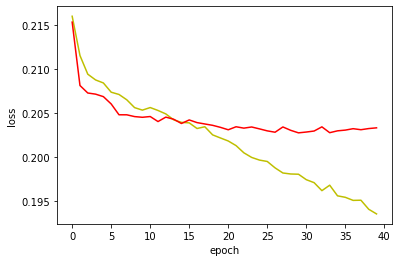

In [8]:
es = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10)
mc = ModelCheckpoint('img_cnn.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'], loss_weights=[0.2,0.4,0.4])
history = model.fit(x_train, y_train, batch_size = 100, epochs = 1000, validation_data = (x_test, y_test), callbacks=[es, mc])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

In [9]:
loaded_model = load_model('img_cnn.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

104/104 [==============================] - 3s 30ms/step - loss: 0.2027 - accuracy: 0.4797

 테스트 정확도: 0.4797


In [ ]:
predictions = model.predict(x_test)
print(predictions[0])
print(y_test[0])

[0.33602422 0.49218157 0.17179422]
[0 1 0]
